In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>")) # sets width of notebook cell

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
app_train = pd.read_csv('../data/raw/application_train.csv')

In [41]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [42]:
print(f'Dataframe has {app_train.shape[0]} rows and {app_train.shape[1]} columns')

Dataframe has 307511 rows and 122 columns


Lets set columns display to number of columns, so we can scroll easily(rows too, just in case we wanted to transpose dataframe)

In [43]:
pd.set_option('display.max_columns', app_train.shape[1])
pd.set_option('display.max_rows', app_train.shape[1])

In [44]:
pd.DataFrame(app_train.dtypes).rename(columns={0:'DataType'}).T

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
DataType,int64,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64


In [8]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
app_train.drop(['SK_ID_CURR', 'TARGET'],axis=1).describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000,307511.000,307511.000,307499.000,307233.000,307511.000,307511.000,307511.000,307511.000,307511.000,104582.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307509.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,134133.000,306851.000,246546.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,151450.000,127568.000,157504.000,103023.000,92646.000,143620.000,152683.000,154491.000,98869.000,124921.000,97312.000,153161.000,93997.000,137829.000,159080.000,306490.000,306490.000,306490.000,306490.000,307510.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,307511.000,265992.000,265992.000,265992.000,265992.000,265992.000,265992.000
mean,0.417,168797.919,599026.000,27108.574,538396.207,0.021,-16036.995,63815.046,-4986.120,-2994.202,12.061,1.000,0.820,0.199,0.998,0.281,0.057,2.153,2.052,2.032,12.063,0.015,0.051,0.041,0.078,0.230,0.180,0.502,0.514,0.511,0.117,0.088,0.978,0.752,0.045,0.079,0.150,0.226,0.232,0.066,0.101,0.107,0.009,0.028,0.114,0.088,0.977,0.760,0.043,0.074,0.145,0.222,0.228,0.065,0.106,0.106,0.008,0.027,0.118,0.088,0.978,0.756,0.045,0.078,0.149,0.226,0.232,0.067,0.102,0.109,0.009,0.028,0.103,1.422,0.143,1.405,0.100,-962.859,0.000,0.710,0.000,0.015,0.088,0.000,0.081,0.004,0.000,0.004,0.000,0.004,0.003,0.001,0.010,0.000,0.008,0.001,0.001,0.000,0.006,0.007,0.034,0.267,0.265,1.900
std,0.722,237123.146,402490.777,14493.737,369446.461,0.014,4363.989,141275.767,3522.886,1509.450,11.945,0.002,0.384,0.400,0.043,0.450,0.231,0.911,0.509,0.503,3.266,0.122,0.220,0.197,0.268,0.421,0.384,0.211,0.191,0.195,0.108,0.082,0.059,0.113,0.076,0.135,0.100,0.145,0.161,0.081,0.093,0.111,0.

In [10]:
365243/365.24

1000.0082137772423

In [18]:
app_train['AMT_INCOME_TOTAL'].mode()

0   135000.000
dtype: float64

## Notes
- children max 19!
- AMT_INCOME_TOTAL
    - max is 117000000.000 	(seems extremely high), while mode is 135000.000
- max days employed is 365243 (+- 1000y)
    - every other DAYS_* Feature is negative number 
- OWN_CAR_AGE 
    - max is 91
- OBS_30_CNT_SOCIAL_CIRCLE
    - How many observation of client's social surroundings with observable 30 DPD (days past due) default
- DEF_30_CNT_SOCIAL_CIRCLE
    - How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

What is meaning of  'observations of client social surroundings' ?
    - what ?
    - how ?

In [19]:
pd.reset_option('display.float_format')

Check for missing Data

In [20]:
def missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """returns DataFrame with count and percentage of NaN values.
        Input:
            df: DataFrame
        Output:
            nan_df: DataFrame containing count and percentage of NaN values of input DataFrame
    """
    count = df.isnull().sum().sort_values(ascending=False)
    n = df.shape[0]
    nan_percentage = count / n*100
    nan_df = pd.concat([count,nan_percentage],axis = 1, keys=['Count', '% of null'])
    return nan_df 

In [21]:
missing_values(app_train)

,Count,% of null
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


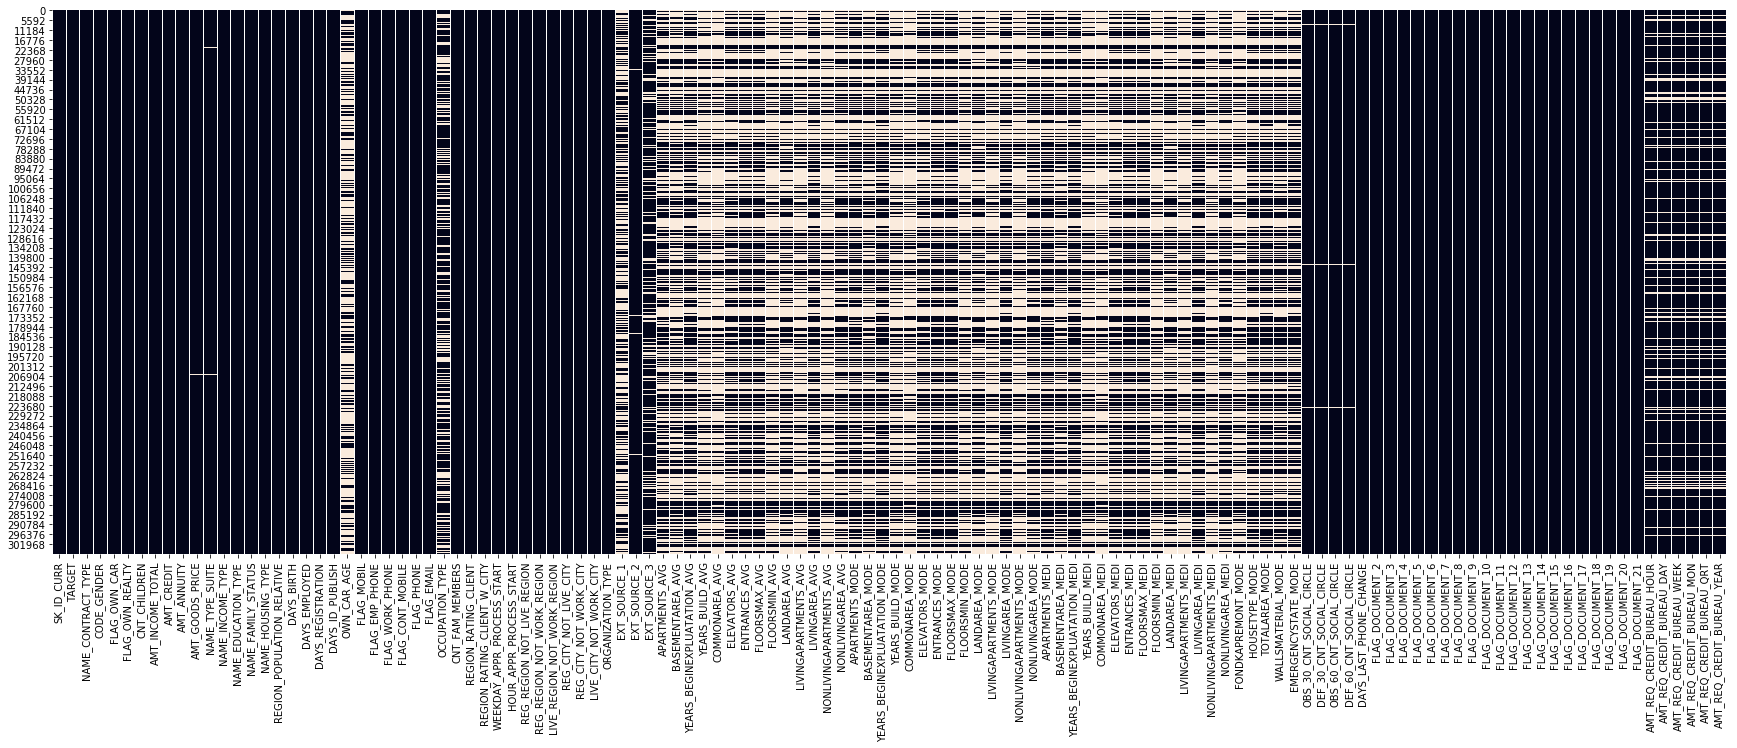

In [22]:
plt.figure(figsize=(30,10))
sns.heatmap(app_train.isnull(), cbar=False)
plt.show()

In [23]:
test_dupl = app_train.iloc[:10,:]

In [35]:
d = pd.concat([app_train, test_dupl],axis=0)

In [34]:
test_dupl

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.06

In [33]:
test_dupl.iloc[2,1:] = test_dupl.iloc[1,0:]

In [36]:
d.shape

(307521, 122)

In [37]:
print(f'DataFrame has {d.duplicated().sum()} duplicate rows.')
no_index_dupl = d.drop('SK_ID_CURR', axis=1).duplicated().sum()
print(f'DataFrame has {no_index_dupl} duplicate rows of data points. (ID is excluded)')

DataFrame has 11 duplicate rows.
DataFrame has 12 duplicate rows of data points. (ID is excluded)


In [38]:
#WIP
def duplicates(df: pd.DataFrame, ID=None, check_dp=None):
    """
    """
    if check_dp and ID:
        no_index_dupl = app_train.drop(ID, axis=1).duplicated().sum()
        print(f'DataFrame has {no_index_dupl} duplicate rows of data points. (ID is excluded)')
    if ID:
        bool_dupl = df[ID].duplicated(keep = False)
        if bool_dupl.all() == False:
            print(f'Dataframe has no duplicate IDs ')
        else:
            return df[~bool_dupl]

In [45]:
print(f'DataFrame has {app_train.duplicated().sum()} duplicate rows.')
no_index_dupl = app_train.drop('SK_ID_CURR', axis=1).duplicated().sum()
print(f'DataFrame has {no_index_dupl} duplicate rows of data points. (ID is excluded)')

DataFrame has 0 duplicate rows.
DataFrame has 0 duplicate rows of data points. (ID is excluded)


In [46]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Lets look at unique values of non continous features.

In [47]:
def filter_columns(df: pd.DataFrame, excl_dtypes: list, excl_columns: list) -> list:
    """Returns list of columns without pre-specified datatypes and column names
        Inputs:
            df: pandas dataframe
            excl_dtypes:  list of excluded datatypes
            excl_columns: list of excluded columns
        Outputs:
            arr: python list of strings (column names)
    """
    return [col for col in df.columns if df[col].dtype not in excl_dtypes and col not in excl_columns]

In [48]:
def unique_values(arr: list, df_name: str) -> dict:
    """Returns list of unique values for each column in input list
        Inputs:
            arr: list of columns
            df_name: name of dataframe
        Outputs:
            dict: dictionary of column_name:unique_values
    """
    d = {}
    for col in arr:
        d[col] =  app_train[col].nunique(),app_train[col].unique().tolist()
    return d    

In [49]:
dtypes_filter = ['float64','int64']
columns_filter = ['SK_ID_CURR', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
filtered_cols = filter_columns(app_train, dtypes_filter, columns_filter)
non_continuous = unique_values(filtered_cols, 'app_train')

In [54]:
for col, val in non_continuous.items():
    print('Column {} has {} distinct values.\n{}'.format(col,val[0],val[1]))
    print('-'*200)

Column NAME_CONTRACT_TYPE has 2 distinct values.
['Cash loans', 'Revolving loans']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column CODE_GENDER has 3 distinct values.
['M', 'F', 'XNA']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_CAR has 2 distinct values.
['N', 'Y']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Column FLAG_OWN_REALTY has 2 distinct values.
['Y', 'N']
-----------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
def annotate_countplot(ax: plt.axes,fnt_size: int, xtext_offset=0):
    """Annotates barplot with count and percentages
        Inputs:
            ax: reference to pyplot axes object
            fnt_size: size of annotation font
            xtext_offset: shift xtext
    """
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        count, perc = height, height/len(app_train)
        ax.annotate('{}  ({:.1%})'.format(count, perc), xy=(x+0.2, y + height ),xytext=(x+xtext_offset, height*1.01),fontsize=fnt_size)

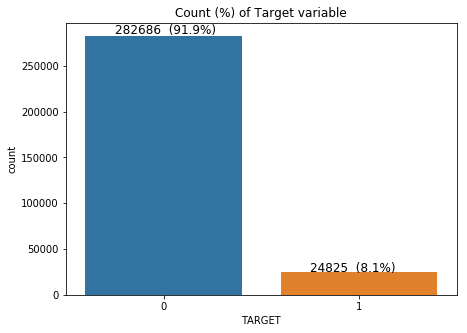

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='TARGET', data=app_train)
ax.set_title('Count (%) of Target variable')
annotate_countplot(ax,12,0.15)
plt.show()

Dependent variable is highly imbalanced.

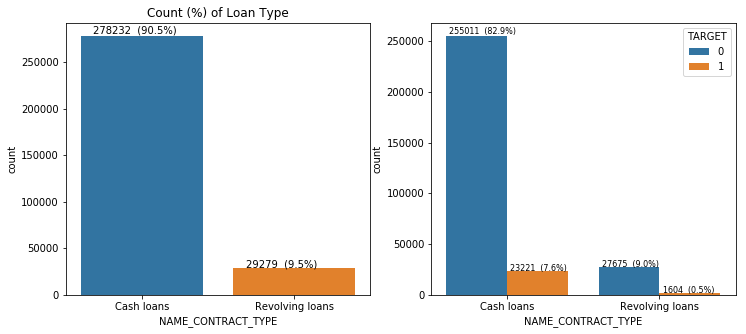

In [59]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax1 = sns.countplot(x='NAME_CONTRACT_TYPE', data=app_train,ax=ax[0])
ax2 = sns.countplot(x='NAME_CONTRACT_TYPE', data=app_train,hue='TARGET',ax=ax[1])
ax1.set_title('Count (%) of Loan Type')
annotate_countplot(ax1,10,0.08)
annotate_countplot(ax2,8,0.02)

Majority of loans are cash loans and payment difficulties happens almost twice as often in case of  cash loans,  in comparison with revolving loans.

In [103]:
target_gender_df = app_train[['TARGET','CODE_GENDER']]
target_gender_df['CODE_GENDER'] = target_gender_df['CODE_GENDER'].map({'M':0, 'F':1}).astype('Int8')

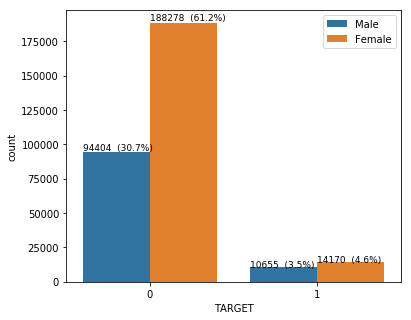

In [106]:
fig,ax = plt.subplots( figsize=(6,5))
ax = sns.countplot(x='TARGET',hue='CODE_GENDER', data=target_gender_df, ax=ax)
ax.legend(['Male','Female'])
annotate_countplot(ax,9)
plt.show()

Females are much more likely to repay loan without issues.

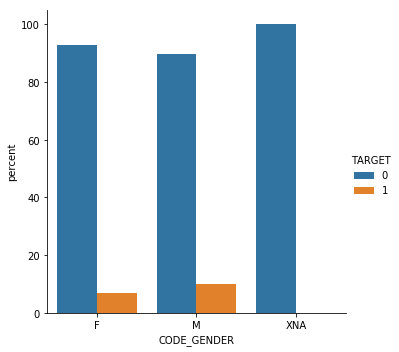

In [108]:
app_train.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'),x='CODE_GENDER',y='percent',hue='TARGET',kind='bar')
plt.show()

count    307511.000000
mean         43.907801
std          11.948195
min          20.504186
25%          33.985640
50%          43.122035
75%          53.887486
max          69.074656
Name: DAYS_BIRTH, dtype: float64


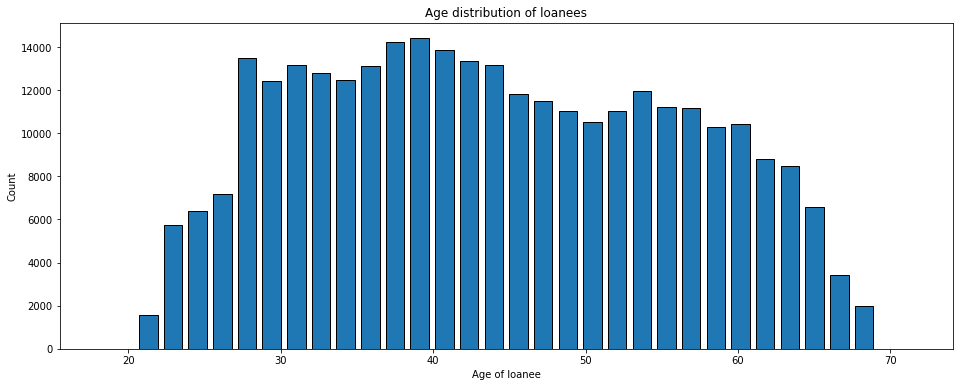

In [110]:
age_df = app_train['DAYS_BIRTH']/-365.2425
print(age_df.describe())
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax1 = sns.distplot(age_df,kde=False,bins=30,hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0},ax=ax);
ax1.set_xlim(age_df.min()-5,age_df.max()+5)
ax1.set_title('Age distribution of loanees')
ax1.set_xlabel('Age of loanee')
ax1.set_ylabel('Count')
plt.show()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


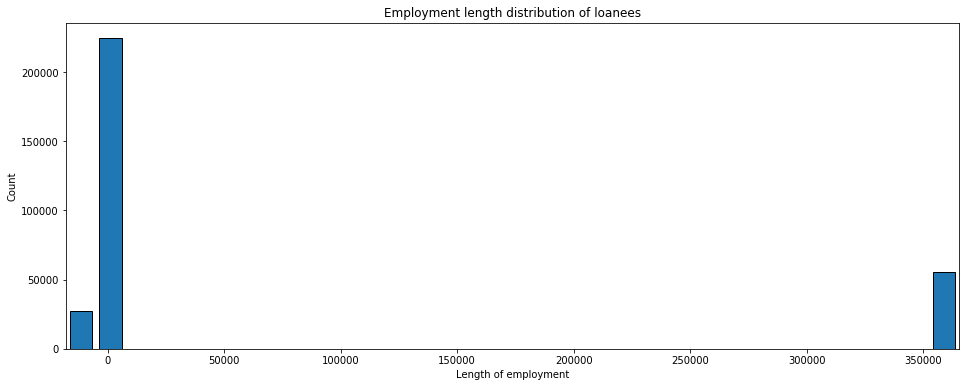

In [111]:
emplo_years_df = app_train['DAYS_EMPLOYED']
print(emplo_years_df.describe())
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax1 = sns.distplot(emplo_years_df,kde=False,bins=30,hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0},ax=ax);
ax1.set_xlim(emplo_years_df.min()-5,emplo_years_df.max()+5)
ax1.set_title('Employment length distribution of loanees')
ax1.set_xlabel('Length of employment')
ax1.set_ylabel('Count')
plt.show()

In [112]:
app_train['DAYS_EMPLOYED'].max()

365243

In [113]:
mask = app_train['DAYS_EMPLOYED'] < app_train['DAYS_EMPLOYED'].max()
print(f'{app_train[~mask].shape[0]} of loans has identical length of employement of loanee and its value is clearly wrong.')

55374 of loans has identical length of employement of loanee and its value is clearly wrong.


For some reason over 55374  loanees are employed over 1000 years. Also it seems that correct value should be negative.

Its almost 1/6 of train set, so it is important to deal with this issue in reasonable way.

count    252137.000000
mean         78.331671
std          76.826615
min          -0.000000
25%          25.199717
50%          54.144894
75%         104.314343
max         588.497169
Name: DAYS_EMPLOYED, dtype: float64


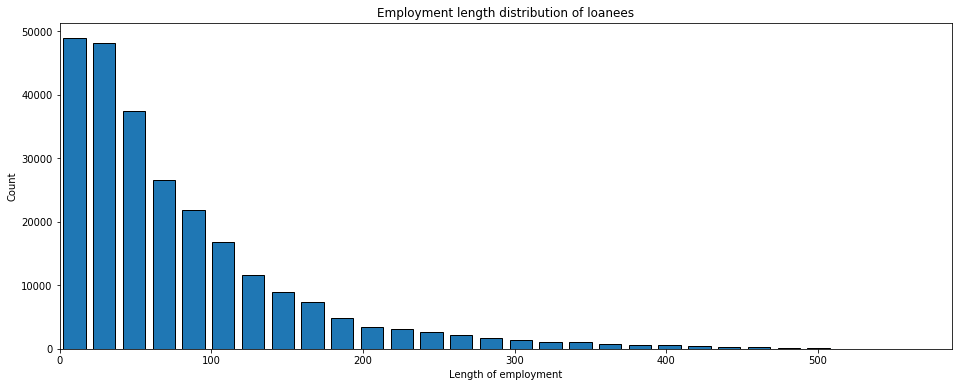

In [115]:
emplo_years_df = app_train['DAYS_EMPLOYED'].mask(~mask)/-30.4368499
print(emplo_years_df.describe())
fig, ax = plt.subplots(1,1, figsize=(16,6))
ax1 = sns.distplot(emplo_years_df,kde=False,bins=30,hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0},ax=ax);
ax1.set_xlim(emplo_years_df.min(),emplo_years_df.max())
ax1.set_title('Employment length distribution of loanees')
ax1.set_xlabel('Length of employment')
ax1.set_ylabel('Count')
plt.show()

In [145]:
app_train.corr()['TARGET'].sort_values(ascending=False).head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078232
REGION_RATING_CLIENT_W_CITY    0.060894
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055209
DAYS_ID_PUBLISH                0.051463
REG_CITY_NOT_WORK_CITY         0.051003
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044402
FLAG_DOCUMENT_3                0.044337
Name: TARGET, dtype: float64

Correlation of features with dependent(target) variable is very low.
Lets look at features with highest positive correlation coefficient, i.e. age of loanee.

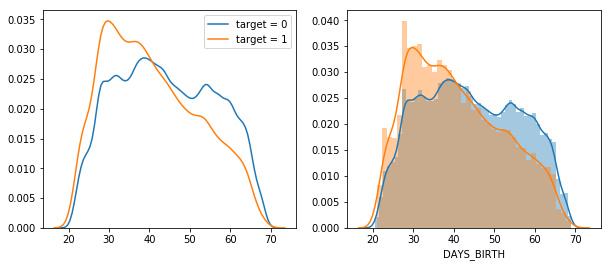

In [147]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365.24, label = 'target = 0',ax=ax[0])
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365.24, label = 'target = 1',ax=ax[0])
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365.24, label = 'target = 0',ax=ax[1])
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365.24, label = 'target = 1',ax=ax[1])
plt.show()

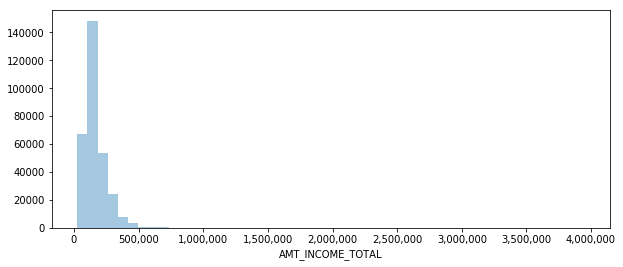

In [148]:
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.distplot(ax=ax, a=app_train['AMT_INCOME_TOTAL'],kde=False)
ticks = ax.axes.get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
ax.set_xticklabels(xlabels)
plt.show()

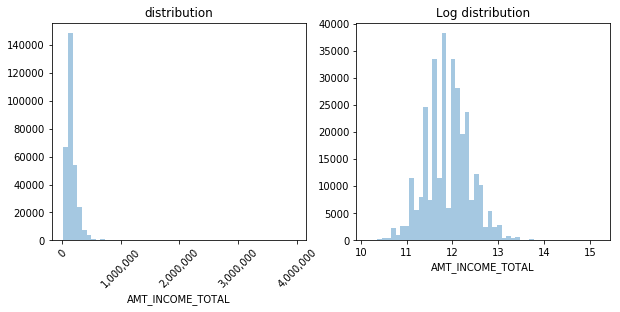

In [149]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(ax=ax[0], a=app_train['AMT_INCOME_TOTAL'],kde=False)
ax[1] = sns.distplot(ax=ax[1], a=np.log(app_train['AMT_INCOME_TOTAL']),kde=False)
ticks = ax[0].axes.get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
ax[0].set_xticklabels(xlabels)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('distribution')
ax[1].set_title('Log distribution')

plt.show()

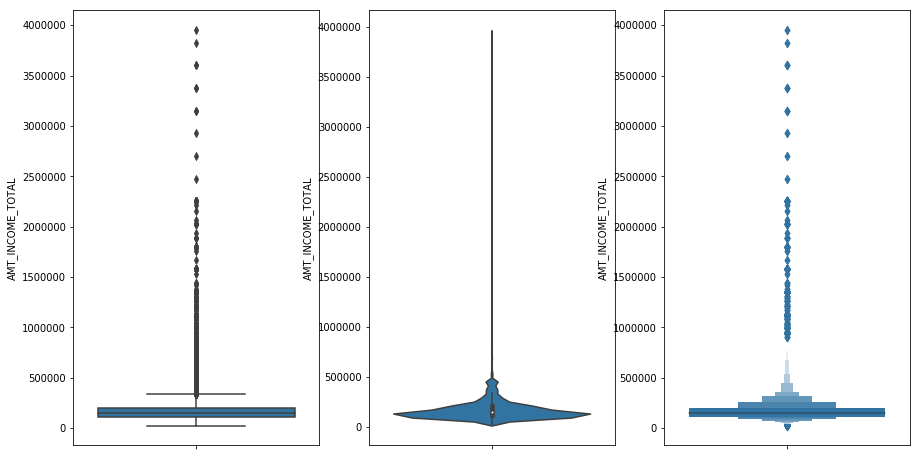

In [150]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.boxplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[0], orient='v')
sns.violinplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[1],orient='v')
sns.boxenplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[2], orient='v')
plt.show()

In [151]:
app_train.sort_values(by='AMT_INCOME_TOTAL',ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.032561,-10572,-3163,-10078.0,-683,1.0,1,1,1,1,1,0,Managers,3.0,1,1,MONDAY,14,0,0,0,0,0,0,Trade: type 2,NaN,0.597760,0.730987,0.0464,0.0221,0.9747,NaN,NaN,0.04,0.0345,0.3333,NaN,0.0192,NaN,0.0394,NaN,0.0089,0.0473,0.0229,0.9747,NaN,NaN,0.0403,0.0345,0.3333,NaN,0.0197,NaN,0.0411,NaN,0.0094,0.0468,0.0221,0.9747,NaN,NaN,0.04,0.0345,0.3333,NaN,0.0196,NaN,0.0401,NaN,0.0090,NaN,block of flats,0.0329,"Stone, brick",No,4.0,0.0,4.0,0.0,-902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
20216,123587,0,Cash loans,M,Y,N,0,3825000.0,1241023.5,117369.0,1206000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.046220,-18456,-1095,-80.0,-2003,6.0,1,1,0,1,0,1,Managers,2.0,1,1,THURSDAY,12,0,1,1,1,0,0,Business Entity Type 3,NaN,0.693795,0.474051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
284311,429258,0,Cash loans,M,Y,N,0,3600000.0,1113840.0,44302.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Municipal apartment,0.035792,-14897,-311,-4872.0,-2190,27.0,1,1,0,1,0,0,Core staff,1.0,2,2,FRIDAY,17,0,0,0,0,0,0,Self-employed,NaN,0.526475,0.746300,0.1052,0.0774,0.9866,0.8164,0.0086,0.00,0.1724,0.2083,0.2500,0.1556,0.0857,0.0834,0.0000,0.0217,0.1071,0.0803,0.9866,0.8236,0.0087,0.0000,0.1724,0.2083,0.2500,0.1592,0.0937,0.0869,0.0000,0.0230,0.1062,0.0774,0.9866,0.8189,0.0087,0.00,0.1724,0.2083,0.2500,0.1584,0.0872,0.0849,0.0000,0.0222,

Drop the most extreme outliers

In [152]:
extreme_outliers = app_train.index[app_train['AMT_INCOME_TOTAL']>4000000].to_list()
print(f'{len(extreme_outliers)} outliers are going to be dropped from total of {app_train.shape[0]} data points.')
app_train.drop(extreme_outliers,inplace=True)

0 outliers are going to be dropped from total of 307502 data points.


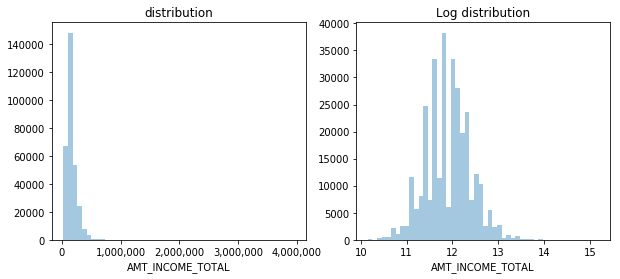

In [153]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(ax=ax[0], a=app_train['AMT_INCOME_TOTAL'],kde=False)
ax[1] = sns.distplot(ax=ax[1], a=np.log(app_train['AMT_INCOME_TOTAL']),kde=False)
ticks = ax[0].axes.get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
ax[0].set_xticklabels(xlabels)
ax[0].set_title('distribution')
ax[1].set_title('Log distribution')
plt.show()

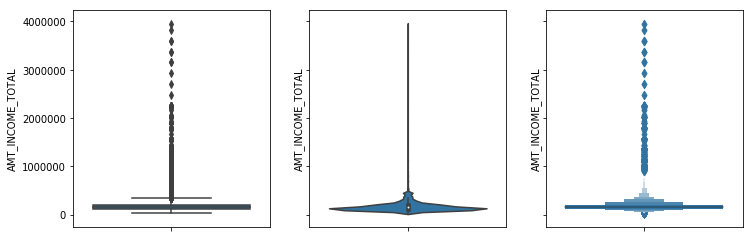

In [154]:
fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
sns.boxplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[0], orient='v')
sns.violinplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[1],orient='v')
sns.boxenplot( x='AMT_INCOME_TOTAL', data=app_train, ax=ax[2], orient='v')
plt.show()

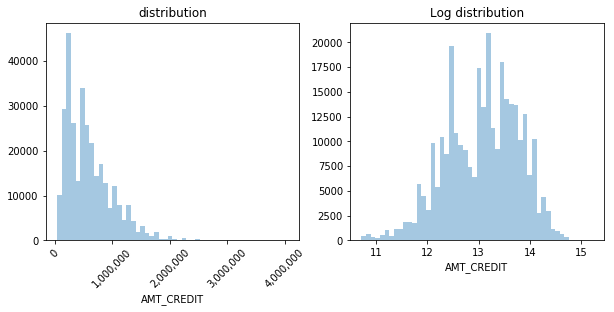

In [124]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0] = sns.distplot(ax=ax[0], a=app_train['AMT_CREDIT'],kde=False)
ax[1] = sns.distplot(ax=ax[1], a=np.log(app_train['AMT_CREDIT']),kde=False)
ticks = ax[0].axes.get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks]
ax[0].set_xticklabels(xlabels)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_title('distribution')
ax[1].set_title('Log distribution')

plt.show()

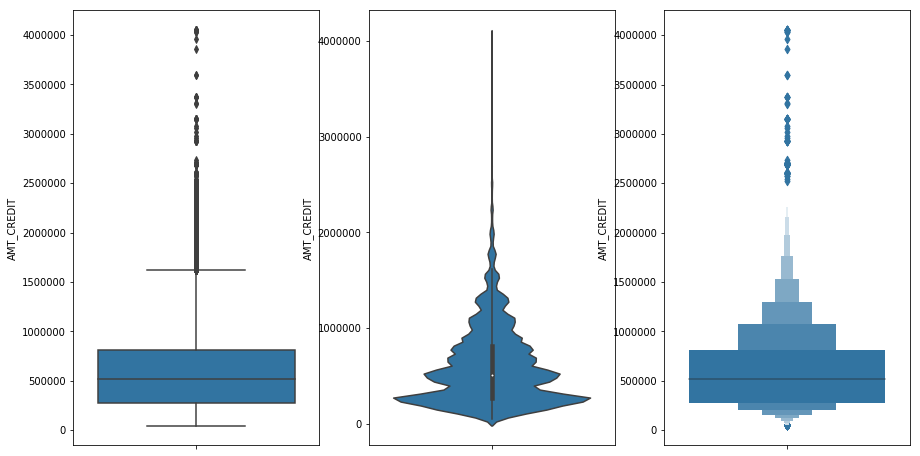

In [125]:
fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.boxplot( x='AMT_CREDIT', data=app_train, ax=ax[0], orient='v')
sns.violinplot( x='AMT_CREDIT', data=app_train, ax=ax[1],orient='v')
sns.boxenplot( x='AMT_CREDIT', data=app_train, ax=ax[2], orient='v')
plt.show()

In [ ]:
app_train.corr()['TARGET'].sort_values(ascending=False).head(10)

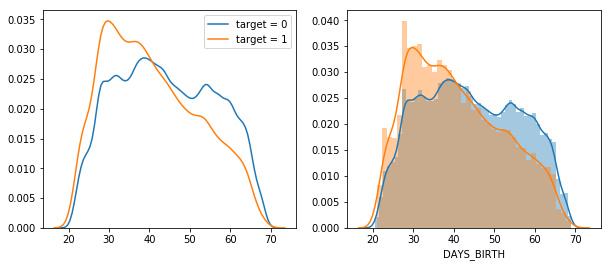

In [144]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365.24, label = 'target = 0',ax=ax[0])
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365.24, label = 'target = 1',ax=ax[0])
sns.distplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365.24, label = 'target = 0',ax=ax[1])
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365.24, label = 'target = 1',ax=ax[1])
plt.show()

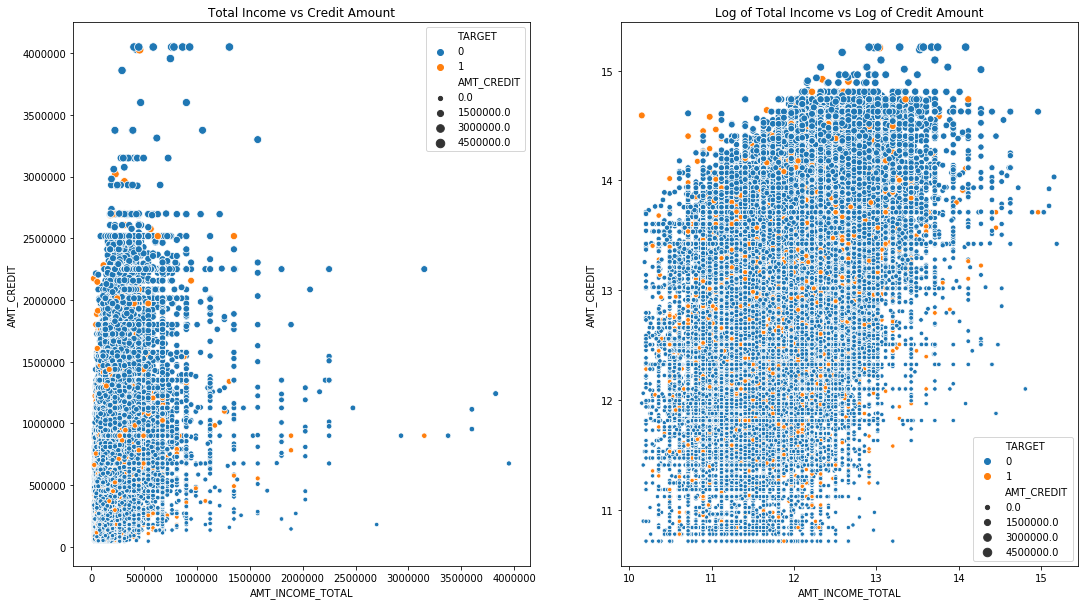

In [127]:
fig,ax = plt.subplots(1,2, figsize=(18,10))
sns.scatterplot(ax=ax[0], x='AMT_INCOME_TOTAL', y='AMT_CREDIT',hue='TARGET',size='AMT_CREDIT', data=app_train)
sns.scatterplot(ax=ax[1], x=np.log(app_train['AMT_INCOME_TOTAL']), y=np.log(app_train['AMT_CREDIT']),hue='TARGET',size='AMT_CREDIT', data=app_train)
ax[0].set_title('Total Income vs Credit Amount')
ax[1].set_title('Log of Total Income vs Log of Credit Amount')
plt.show()

In [128]:
days = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']

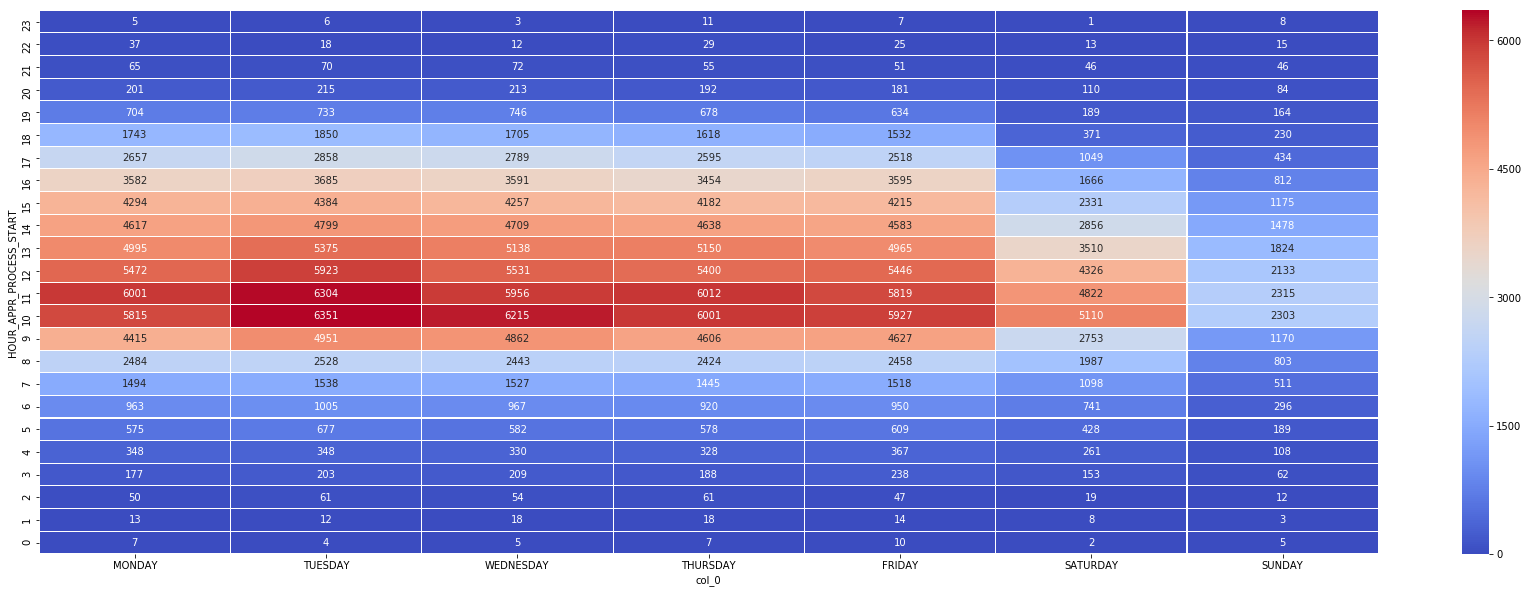

In [129]:
fig = plt.figure(figsize=(30,10))
g = sns.heatmap(pd.crosstab(app_train['HOUR_APPR_PROCESS_START'],pd.Categorical(app_train['WEEKDAY_APPR_PROCESS_START'],categories=days)).sort_values('HOUR_APPR_PROCESS_START',ascending=False)\
                ,annot=True, fmt='.0f', cmap="coolwarm", linewidths=0.05)
plt.show()

In [130]:
continuous_columns = filter_columns(app_train, ['object','int64'],[])

In [134]:
excl_bureau_enq = ['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']

Correlation of features with dependent variable is very low.
Lets look at feature with highest positive correlation coefficient, i.e. age of loanee.

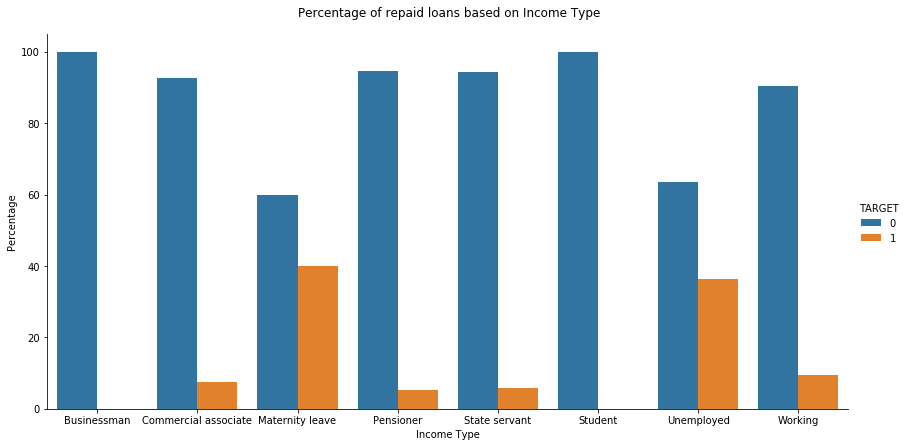

In [135]:
g = app_train.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_INCOME_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')
(g.set(xlabel='Income Type', ylabel='Percentage',label='Paid Off'),
)
g.fig.suptitle('Percentage of repaid loans based on Income Type',y=1.03)
plt.show()

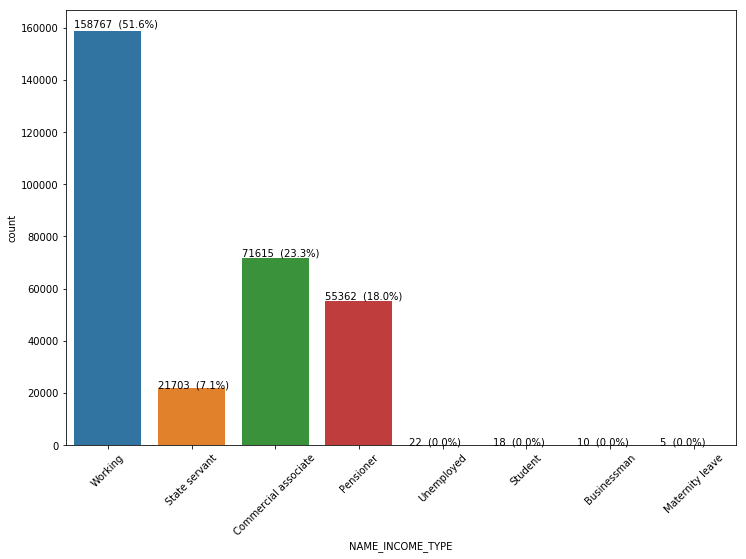

In [136]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x="NAME_INCOME_TYPE", data=app_train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
annotate_countplot(ax,10)
plt.show()

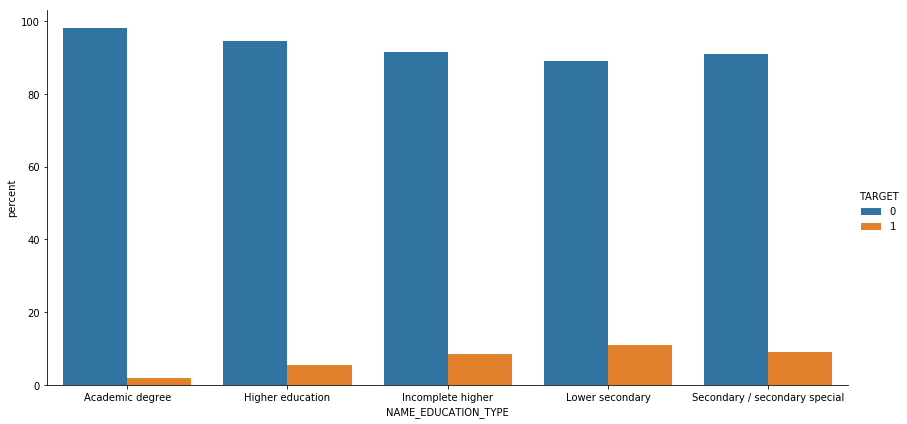

In [137]:
g = app_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_EDUCATION_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

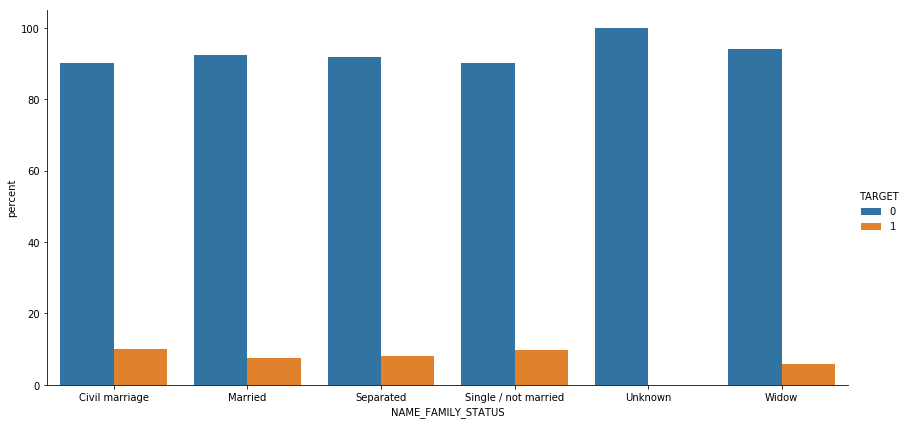

In [138]:
g = app_train.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_FAMILY_STATUS',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

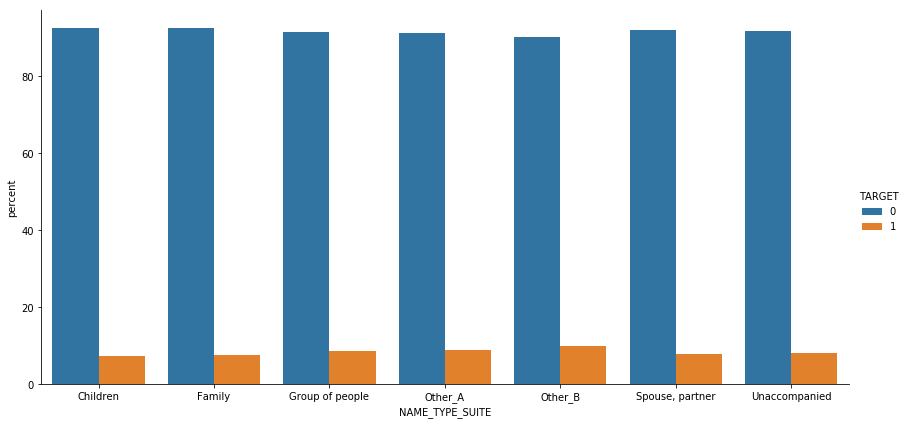

In [139]:
g = app_train.groupby('NAME_TYPE_SUITE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_TYPE_SUITE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

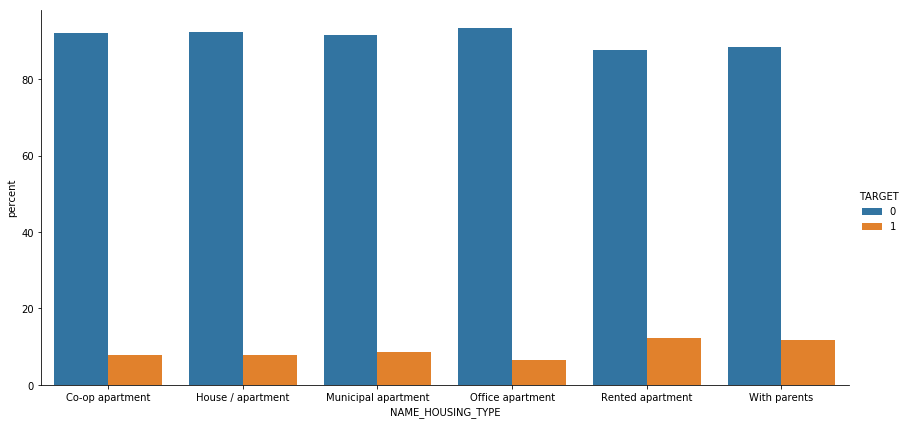

In [140]:
g = app_train.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts(normalize=True).mul(100).\
rename('percent').reset_index()\
.pipe((sns.catplot,'data'),x='NAME_HOUSING_TYPE',y='percent',hue='TARGET',height=6, aspect=8/4,kind='bar')

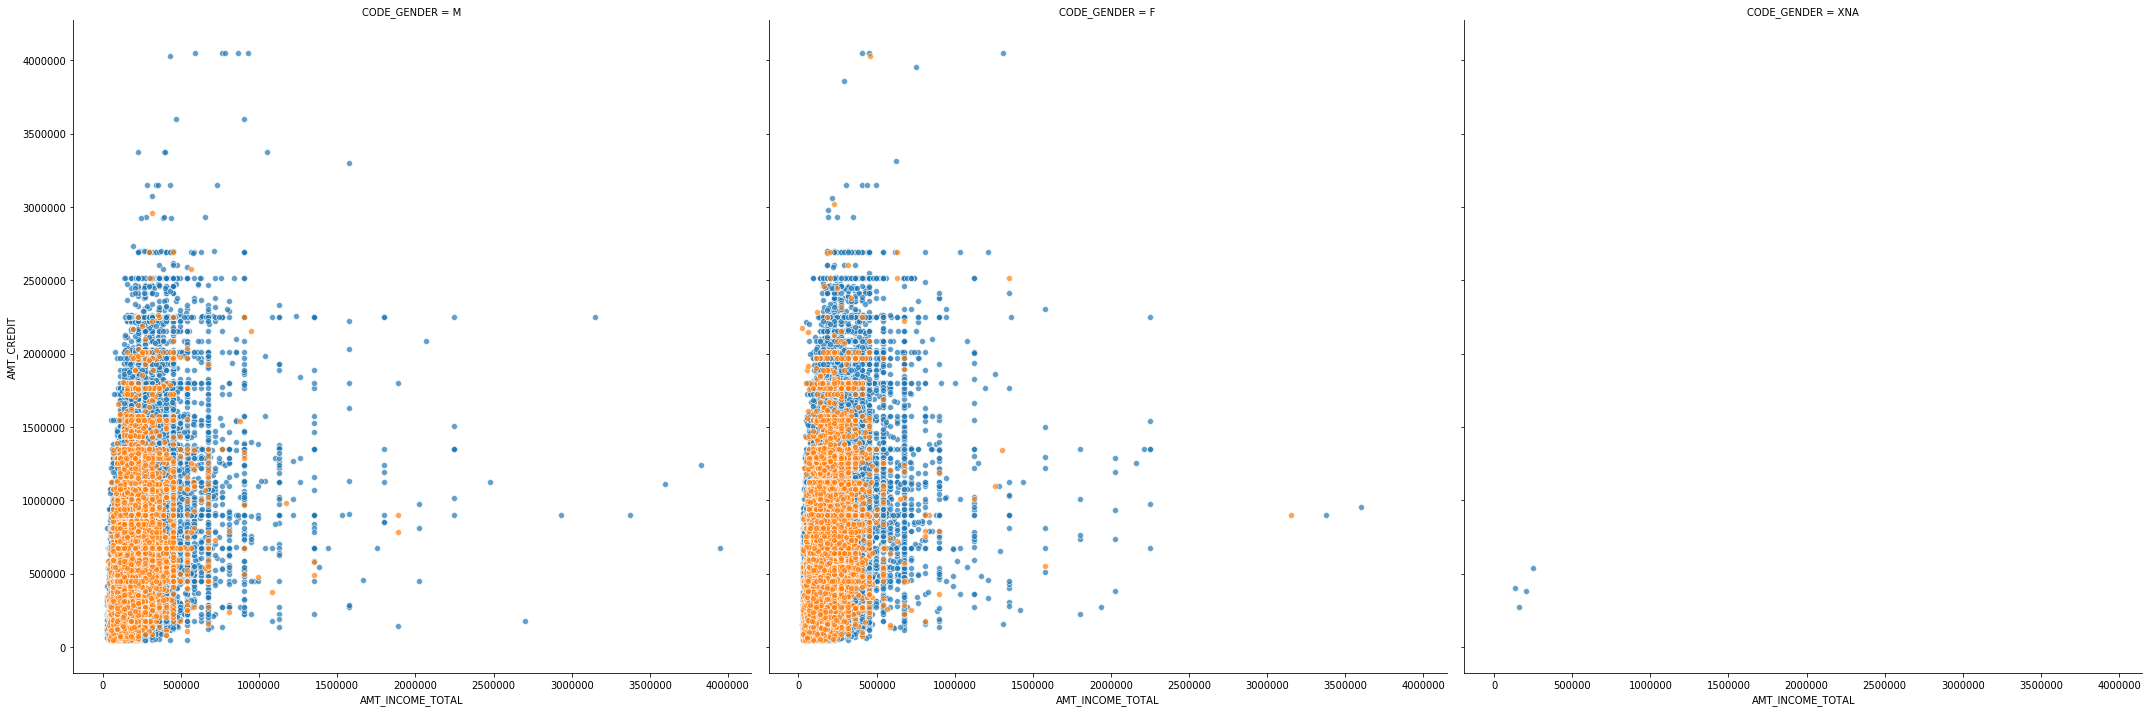

In [142]:
g = sns.FacetGrid(app_train,col='CODE_GENDER', hue='TARGET', height=10, aspect=1)
g.map(sns.scatterplot,'AMT_INCOME_TOTAL', 'AMT_CREDIT', alpha=.7)
plt.show()